# Figures

Need to make sure the single column figues are the same physical dimesions

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import MaxNLocator

In [2]:
SINGLE_COL_WIDTH = 3.4039 #INCHES
DOUBLE_COL_WIDTH = 7.0569 #INCHES 

SMALL_SIZE = 6.5
MEDIUM_SIZE = 8.5
BIGGER_SIZE = 10.5

plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines',linewidth=0.75)
#plt.rcParams['ytick.major.pad']='0.5'

In [3]:
#plt.style.use('paper.mplstyle')

In [4]:
fname = 'mollow-triplets/fluorsecence-spectra.pickle'
with open(fname, 'rb') as f:
    fluorescence_data = pickle.load(f)

<ipython-input-5-68ec3683a167>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


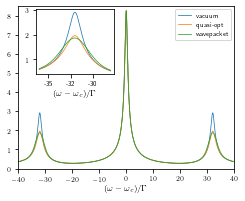

In [5]:
fig, ax = plt.subplots(figsize=(SINGLE_COL_WIDTH,2.8))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.145, 0.63, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])

ax.plot(fluorescence_data['omegas'], np.abs(fluorescence_data['vacuum']), label='vacuum')
ax.plot(fluorescence_data['omegas'], np.abs(fluorescence_data['quasi-optimized']), label='quasi-opt')
ax.plot(fluorescence_data['omegas'], np.abs(fluorescence_data['wavepacket']), label='wavepacket')
ax.set_xlabel(r'$(\omega-\omega_c)/\Gamma$')
ax.set_xlim(-40,40)
ax.set_ylim(0,8.5)
ax.legend()
min_idx = np.argmin((fluorescence_data['omegas']+36)**2)
max_idx = np.argmin((fluorescence_data['omegas']+28)**2)
ax2.plot((fluorescence_data['omegas'])[min_idx:max_idx],(np.abs(fluorescence_data['vacuum']))[min_idx:max_idx])
ax2.plot((fluorescence_data['omegas'])[min_idx:max_idx],(np.abs(fluorescence_data['quasi-optimized']))[min_idx:max_idx])
ax2.plot((fluorescence_data['omegas'])[min_idx:max_idx],(np.abs(fluorescence_data['wavepacket']))[min_idx:max_idx])
ax2.set_xlabel(r'$(\omega-\omega_c)/\Gamma$')
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.tight_layout()
plt.savefig('mollow-triplet-quasi-optimized.pdf',bbox_inches = 'tight', pad_inches = 0.005)

In [6]:
SINGLE_COL_WIDTH

3.4039

# Qualitative comparison between the Markovian and wave packet



## Match Short time decay

In [7]:
filename = "short_time_markov_WP_cmp_data.pickle"
st_pur_dat = pickle.load(open(filename, "rb"))

In [8]:
# from matplotlib.ticker import ScalarFormatter
# from matplotlib import ticker

# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(False) 
#formatter.set_powerlimits((-1,1)) 
#?ticker.LogFormatterSciNotation

In [9]:
#st_pur_dat

### New plots based on Ben and Tom's suggestions

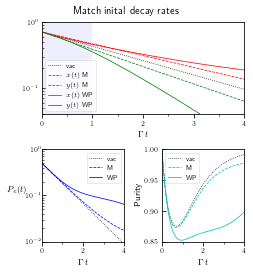

In [10]:
#fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(SINGLE_COL_WIDTH, 4), sharey=False)


fig = plt.figure(figsize=(SINGLE_COL_WIDTH, 3.5), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, -1])


fig.suptitle('Match inital decay rates',y=1.04)

ax1.plot(st_pur_dat['times'], st_pur_dat['vac_x'], label=r'vac',linestyle=':',color='k')
ax1.plot(st_pur_dat['times'], st_pur_dat['xm'], label=r'$x(t)$ M',linestyle='--',color='r')
ax1.plot(st_pur_dat['times'], st_pur_dat['ym'], label=r'$y(t)$ M',linestyle='--',color='g')
ax1.semilogy(st_pur_dat['times'], st_pur_dat['xwp'], label=r'$x(t)$ WP',linestyle='-',color='r')
ax1.semilogy(st_pur_dat['times'], st_pur_dat['ywp'], label=r'$y(t)$ WP',linestyle='-',color='g')
#ax1.text(0.5, 0.7,r'Markovian', verticalalignment='top', horizontalalignment='center')
ax1.fill_betweenx(np.array([0.0,1]), x1=0, x2=1, facecolor='blue', alpha=0.066)
ax1.set_yscale('log')
ax1.set_ylim([4e-2,1e0])
ax1.set_xlim(0.0, 4.0)
ax1.set_xlabel(r'$\Gamma\, t $')
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax1.set_xticks([0.0,1.0,2.0,3.0,4.0])
#ax1.set_yticks([0.4,0.5,0.6,0.7])
#ax1.set_yticklabels(['0.4','0.5','0.6','0.7'])
#ax1.set_title('gs[0, :]')
ax1.tick_params(axis='y',which='both',direction='in')
legy = ax1.legend()
legy.get_frame().set_linewidth(0.5)



rwp_plot = np.round(st_pur_dat['r_val_wp'],3)
rbb_plot = np.round(st_pur_dat['r_val_bb'],3)

#ax2.plot(st_pur_dat['times'], xi_rect(times,a=0, b=xi_len),label=r'$\xi(t)$',linestyle='--',color='k')
ax2.semilogy(st_pur_dat['times'], st_pur_dat['Pevac'], label='vac',linestyle=':',color='k')
ax2.semilogy(st_pur_dat['times'], st_pur_dat['Pem'], label='M',linestyle='--',color='b')
ax2.semilogy(st_pur_dat['times'], st_pur_dat['Pewp'],label='WP',linestyle='-',color='b')
#ax2.fill_betweenx(np.array([0.0,1]), x1=0, x2=1, facecolor='blue', alpha=0.066)
ax2.set_yscale('log')
ax2.set_xlim(0.0, 4.001)
ax2.set_ylim(1e-2, 1.00) 
#ax2.set_title('gs[-1, 0]')
ax2.set_ylabel(r'$P_e(t)$',rotation=0,labelpad=8) 
ax2.set_xlabel(r'$\Gamma\, t $')
ax2.tick_params(axis='y',which='both',direction='in',pad=0.5)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1))
legy = ax2.legend()
legy.get_frame().set_linewidth(0.5)

# #axs[2,1].plot(times, markov_soln.get_purities(),label='Markov r = ' + str(rbb_plot), linestyle='--',color='c')
ax3.plot(st_pur_dat['times'], st_pur_dat['Purityvac'],label='vac',linestyle=':',color='k')
ax3.plot(st_pur_dat['times'], st_pur_dat['Puritym'],label='M', linestyle='--',color='c')
ax3.plot(st_pur_dat['times'], st_pur_dat['Puritywp'],label='WP',linestyle='-',color='c')
#ax3.fill_betweenx(np.array([0.0,1]), x1=0, x2=1, facecolor='blue', alpha=0.066)
# #f3_ax2.set_yscale('log')
ax3.set_xlim(0.0, 4.001)
ax3.set_ylim(0.85, 1.0) 
ax3.set_xlabel(r'$\Gamma\, t $')
ax3.set_yticks([0.85,0.9,0.95,1.0])
ax3.set_ylabel(r'Purity',labelpad=2)
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax3.tick_params(axis='y',which='both',direction='in')
legy = ax3.legend() #loc='upper left')
legy.get_frame().set_linewidth(0.5)


# plt.tight_layout()

name='wp_v_markov_cmp'
plt.savefig(name+'.pdf',bbox_inches = 'tight', pad_inches = 0.01)

In [11]:
print('r_wp', st_pur_dat['r_val_wp'])
print('r_bb',st_pur_dat['r_val_bb'])

r_wp 0.5180816459236602
r_bb 0.09570808577932297


In [12]:
#M and N params
r_val_bb = st_pur_dat['r_val_bb']
r_val_wp = st_pur_dat['r_val_wp']
mu_val = st_pur_dat['mu_val']
M = - np.exp(2j*mu_val)* np.sinh(r_val_bb) * np.cosh(r_val_bb)
N = np.sinh(r_val_bb)**2

print(N,M)
print(N+M+1/2)
print(N-M+1/2)

0.009188040628679658 (-0.09629361723018783-0j)
(0.4128944233984918+0j)
(0.6054816578588675+0j)


In [13]:
# expected modification of decay rate relative to vac
2*N+1

1.0183760812573592

## Match "steady state" value

In [14]:
filename = "long_time_markov_WP_cmp_data.pickle"
lt_pur_dat = pickle.load(open(filename, "rb"))

<ipython-input-15-db0acbe4bb17>:70: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


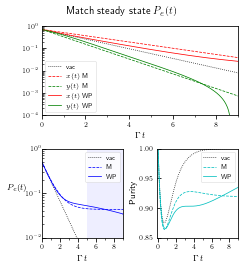

In [15]:

fig = plt.figure(figsize=(SINGLE_COL_WIDTH, 3.5), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, -1])


fig.suptitle(r'Match steady state $P_e(t)$',y=1.04)

ax1.plot(lt_pur_dat['times'], lt_pur_dat['vac_x'], label=r'vac',linestyle=':',color='k')
ax1.plot(lt_pur_dat['times'], lt_pur_dat['xm'], label=r'$x(t)$ M',linestyle='--',color='r')
ax1.plot(lt_pur_dat['times'], lt_pur_dat['ym'], label=r'$y(t)$ M',linestyle='--',color='g')
ax1.semilogy(lt_pur_dat['times'], lt_pur_dat['xwp'], label=r'$x(t)$ WP',linestyle='-',color='r')
ax1.semilogy(lt_pur_dat['times'], lt_pur_dat['ywp'], label=r'$y(t)$ WP',linestyle='-',color='g')
#ax1.text(0.5, 0.7,r'Markovian', verticalalignment='top', horizontalalignment='center')
#ax1.fill_betweenx(np.array([0.0,1]), x1=0, x2=1, facecolor='blue', alpha=0.066)
ax1.set_yscale('log')
ax1.set_ylim([1e-4,1e0])
ax1.set_xlim(0.0, 9.0)
ax1.set_xlabel(r'$\Gamma\, t $')
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set_xticks([0,2,4,6,8])
#ax1.set_yticks([0.4,0.5,0.6,0.7])
#ax1.set_yticklabels(['0.4','0.5','0.6','0.7'])
#ax1.set_title('gs[0, :]')
ax1.tick_params(axis='y',which='both',direction='in')
legy = ax1.legend()
legy.get_frame().set_linewidth(0.5)



rwp_plot = np.round(lt_pur_dat['r_val_wp'],3)
rbb_plot = np.round(lt_pur_dat['r_val_bb'],3)

#ax2.plot(st_pur_dat['times'], xi_rect(times,a=0, b=xi_len),label=r'$\xi(t)$',linestyle='--',color='k')
ax2.semilogy(lt_pur_dat['times'], lt_pur_dat['Pevac'], label='vac',linestyle=':',color='k')
ax2.semilogy(lt_pur_dat['times'], lt_pur_dat['Pem'], label='M',linestyle='--',color='b')
ax2.semilogy(lt_pur_dat['times'], lt_pur_dat['Pewp'],label='WP',linestyle='-',color='b')
ax2.fill_betweenx(np.array([0,1]), x1=5, x2=9, facecolor='blue', alpha=0.066)
ax2.set_yscale('log')
ax2.set_xlim(0.0, 9.00)
ax2.set_ylim(1e-2, 1.00) 
#ax2.set_title('gs[-1, 0]')
ax2.set_ylabel(r'$P_e(t)$',rotation=0,labelpad=8) 
ax2.set_xlabel(r'$\Gamma\, t $')
ax2.set_xticks([0,2,4,6,8])
ax2.tick_params(axis='y',which='both',direction='in',pad=0.5)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1))
legy = ax2.legend()
legy.get_frame().set_linewidth(0.5)

# #axs[2,1].plot(times, markov_soln.get_purities(),label='Markov r = ' + str(rbb_plot), linestyle='--',color='c')
ax3.plot(lt_pur_dat['times'], lt_pur_dat['Purityvac'],label='vac',linestyle=':',color='k')
ax3.plot(lt_pur_dat['times'], lt_pur_dat['Puritym'],label='M', linestyle='--',color='c')
ax3.plot(lt_pur_dat['times'], lt_pur_dat['Puritywp'],label='WP',linestyle='-',color='c')
#ax3.fill_betweenx(np.array([0.0,1]), x1=0, x2=1, facecolor='blue', alpha=0.066)
# #f3_ax2.set_yscale('log')
ax3.set_xlim(-0.1, 9.00)
ax3.set_ylim(0.85, 1.0) 
ax3.set_xlabel(r'$\Gamma\, t $')
ax3.set_yticks([0.85,0.9,0.95,1.0])
ax3.set_ylabel(r'Purity',labelpad=2)
ax3.set_xticks([0,2,4,6,8])
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax3.tick_params(axis='y',which='both',direction='in')
legy = ax3.legend() #loc='upper left')
legy.get_frame().set_linewidth(0.5)


plt.tight_layout()

name='wp_v_markov_cmp_exitation'
plt.savefig(name+'.pdf',bbox_inches = 'tight', pad_inches = 0.01)


## Discarded population

In [15]:
eps_focks = np.load('eps_focks.npy')
eps_sqs = np.load('eps_sqs.npy')

In [16]:
SINGLE_COL_WIDTH

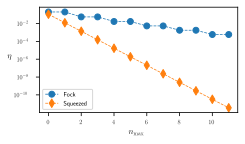

In [17]:
#with plt.style.context('paper.mplstyle'):


fig, ax = plt.subplots(figsize=(SINGLE_COL_WIDTH,2))
ax.semilogy(eps_focks, linestyle='--', marker='o', label='Fock')
ax.semilogy(eps_sqs, linestyle='--', marker='d', label='Squeezed')
ax.set_xlabel(r'$n_\mathrm{max}$')
ax.set_ylabel(r'$\eta$', rotation=0)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend()
plt.tight_layout()
plt.savefig('discarded-population.pdf', bbox_inches='tight', pad_inches=0.005)

## Vacuum approximation

In [18]:
with open('vacuum-collected-plot-data.pickle', 'rb') as f:
    vac_data = pickle.load(f)

In [19]:
def plot_difference(times, n_maxs, Pe_expts, vac_Pe_expt, ax):
    for n_max in n_maxs:
        ax.plot(times, Pe_expts[n_max] - vac_Pe_expt, label=str(n_max))

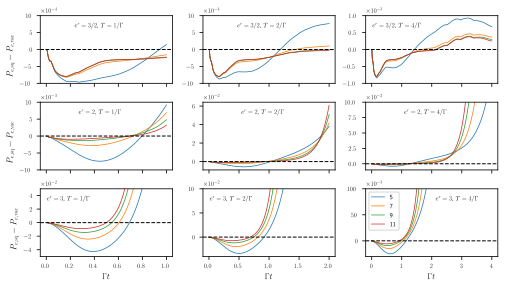

In [50]:
#with plt.style.context('paper.mplstyle'):

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(DOUBLE_COL_WIDTH, 4), sharex='col')

axs[0,0].text(0.5, 0.9, r'$e^r=3/2$, $T=1/\Gamma$', verticalalignment='top', horizontalalignment='center',
              transform=axs[0,0].transAxes)
plot_difference(vac_data['times']['T1'], vac_data['nmaxs'][4::2], vac_data['Pe']['1T1'], vac_data['vacPe']['T1'], axs[0,0])
axs[0,0].set_ylim(-0.001, .001)
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))

axs[1,0].text(0.5, 0.9, r'$e^r=2$, $T=1/\Gamma$', verticalalignment='top', horizontalalignment='center',
              transform=axs[1,0].transAxes)
plot_difference(vac_data['times']['T1'], vac_data['nmaxs'][4::2], vac_data['Pe']['2T1'], vac_data['vacPe']['T1'], axs[1,0])
axs[1,0].set_ylim(-0.01, .01)
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))

axs[2,0].text(0.05, 0.9, r'$e^r=3$, $T=1/\Gamma$', verticalalignment='top', horizontalalignment='left',
              transform=axs[2,0].transAxes)
plot_difference(vac_data['times']['T1'], vac_data['nmaxs'][4::2], vac_data['Pe']['3T1'], vac_data['vacPe']['T1'], axs[2,0])
axs[2,0].set_ylim(-.05, .05)
axs[2,0].ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

axs[0,1].text(0.5, 0.9, r'$e^r=3/2$, $T=2/\Gamma$', verticalalignment='top', horizontalalignment='center',
              transform=axs[0,1].transAxes)
plot_difference(vac_data['times']['T2'], vac_data['nmaxs'][4::2], vac_data['Pe']['1T2'], vac_data['vacPe']['T2'], axs[0,1])
axs[0,1].set_ylim(-0.001, .001)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))

axs[1,1].text(0.5, 0.9, r'$e^r=2$, $T=2/\Gamma$', verticalalignment='top', horizontalalignment='center',
              transform=axs[1,1].transAxes)
plot_difference(vac_data['times']['T2'], vac_data['nmaxs'][4::2], vac_data['Pe']['2T2'], vac_data['vacPe']['T2'], axs[1,1])
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

axs[2,1].text(0.05, 0.9, r'$e^r=3$, $T=2/\Gamma$', verticalalignment='top', horizontalalignment='left',
              transform=axs[2,1].transAxes)
plot_difference(vac_data['times']['T2'], vac_data['nmaxs'][4::2], vac_data['Pe']['3T2'], vac_data['vacPe']['T2'], axs[2,1])
axs[2,1].set_ylim(-0.04, .1)
axs[2,1].ticklabel_format(axis='y', style='sci', scilimits=(-2,-1))

axs[0,2].text(0.05, 0.9, r'$e^r=3/2$, $T=4/\Gamma$', verticalalignment='top', horizontalalignment='left',
              transform=axs[0,2].transAxes)
plot_difference(vac_data['times']['T4'], vac_data['nmaxs'][4::2], vac_data['Pe']['1T4'], vac_data['vacPe']['T4'], axs[0,2])
axs[0,2].set_ylim(-0.001, .001)
axs[0,2].ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))

axs[1,2].text(0.5, 0.9, r'$e^r=2$, $T=4/\Gamma$', verticalalignment='top', horizontalalignment='center',
              transform=axs[1,2].transAxes)
plot_difference(vac_data['times']['T4'], vac_data['nmaxs'][4::2], vac_data['Pe']['2T4'], vac_data['vacPe']['T4'], axs[1,2])
axs[1,2].set_ylim(-.01, .1)
axs[1,2].ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

axs[2,2].text(0.95, 0.9, r'$e^r=3$, $T=4/\Gamma$', verticalalignment='top', horizontalalignment='right',
              transform=axs[2,2].transAxes)
plot_difference(vac_data['times']['T4'], vac_data['nmaxs'][4::2], vac_data['Pe']['3T4'], vac_data['vacPe']['T4'], axs[2,2])
axs[2,2].set_ylim(-0.03, .1)
axs[2,2].ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))

for ax_row in axs:
    ax_row[0].set_ylabel(r'$P_{e,\mathrm{sq}}-P_{e,\mathrm{vac}}$')
    for ax in ax_row:
        ax.axhline(0, linestyle='--', color='k', linewidth=1)
for ax in axs[-1]:
    ax.set_xlabel(r'$\Gamma t$')
axs[2,2].legend(loc='upper left')
plt.tight_layout()
plt.savefig('vacuum-diffs.pdf', bbox_inches='tight', pad_inches=0.005)

## Process eigenvalues

In [21]:
def process_default_kwargs(kwargs, default_kwargs):
    """Update a default kwarg dict with user-supplied values

    """
    if kwargs is None:
        kwargs = {}
    for kwarg, value in kwargs.items():
        default_kwargs[kwarg] = value

def bar_plot(yvals, xvals=None, ax=None, subplots_kwargs=None, bar_kwargs=None):
    '''Plot an array of y values as bars wrt optional x values.

    '''
    default_subplots_kwargs = {}
    process_default_kwargs(subplots_kwargs, default_subplots_kwargs)
    default_bar_kwargs = {}
    process_default_kwargs(bar_kwargs, default_bar_kwargs)
    force_int_xticks = False
    if xvals is None:
        xvals = np.arange(len(yvals))
        force_int_xticks = True
    return_figax = False
    if ax is None:
        fig, ax = plt.subplots(**default_subplots_kwargs)
        return_figax = True
    ax.bar(xvals, yvals, **default_bar_kwargs)
    if force_int_xticks:
        # If using integer xvals, only put ticks at integer values.
        # Adapted from <https://stackoverflow.com/a/34880501/1236650>
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    return (fig, ax) if return_figax else None

In [22]:
with open('negativity-data.pickle', 'rb') as f:
    neg_data = pickle.load(f)

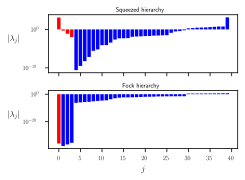

In [23]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(SINGLE_COL_WIDTH, 2.5))
bar_plot(np.log(neg_data['sqz-eigvals'][neg_data['sqz-pos-eigval-idxs']]), neg_data['sqz-pos-eigval-idxs'][0],
         axs[0], bar_kwargs=dict(color='b'))
bar_plot(np.log(np.abs(neg_data['sqz-eigvals'][neg_data['sqz-neg-eigval-idxs']])), neg_data['sqz-neg-eigval-idxs'][0],
         axs[0], bar_kwargs=dict(color='r'))
bar_plot(np.log(neg_data['fock-eigvals'][neg_data['fock-pos-eigval-idxs']]), neg_data['fock-pos-eigval-idxs'][0],
         axs[1], bar_kwargs=dict(color='b'))
bar_plot(np.log(np.abs(neg_data['fock-eigvals'][neg_data['fock-neg-eigval-idxs']])), neg_data['fock-neg-eigval-idxs'][0],
         axs[1], bar_kwargs=dict(color='r'))
axs[0].set_title('Squeezed hierarchy',y=0.95)
axs[0].set_yticks([-10, 0])
axs[0].set_yticklabels(['$10^{-10}$', '$10^0$'])
axs[0].set_ylabel(r'$|\lambda_j|$', rotation=0, labelpad=8)
axs[1].set_title('Fock hierarchy',y=0.95)
axs[1].set_yticks([-20, 0])
axs[1].set_yticklabels(['$10^{-20}$', '$10^0$'])
axs[1].set_xlabel('$j$')
axs[1].set_ylabel(r'$|\lambda_j|$', rotation=0, labelpad=8)
plt.tight_layout()
plt.savefig('choi-eigvals.pdf', bbox_inches='tight', pad_inches=0.005)